In [315]:
library(rvest)
library(tidyverse)
library(polite)
library(stringi)
library(plyr)

In [316]:
url <- 'https://www.statsf1.com/en/circuits.aspx'

In [795]:
session <- bow(url)
page <- scrape(session, query=list(t="semi-soft", per_page=100))

In [796]:
circuits_df <- page %>% html_node('.sortable') %>% html_table(header = TRUE)

In [797]:
circuits_df <- data.frame(circuits_df)

In [798]:
circuits_df %>% head(3)

,X78.Circuits,Var.2,Countries,Countries.1,Begin.in,Nb
,<chr>,<chr>,<lgl>,<chr>,<int>,<int>
1,Adelaïde,Adelaide Street Circuit,NA,Australia,1985,11
2,Aïda,Okayama International Circuit,NA,Japan,1994,2
3,Ain-Diab,,NA,Morocco,1958,1


In [799]:
circuits_df <- circuits_df %>% select('X78.Circuits', Countries.1, Nb)

In [800]:
names(circuits_df) = c('Circuit', 'Country', 'Races')

In [802]:
url <- 'https://www.statsf1.com/en/circuits.aspx'
session <- bow(url)
page <- scrape(session, query=list(t="semi-soft", per_page=100))
circuits_df <- page %>% html_node('.sortable') %>% html_table(header = TRUE)
circuits_df <- data.frame(circuits_df)
circuits_df <- circuits_df %>% select('X78.Circuits', Countries.1, Nb)
names(circuits_df) = c('Circuit', 'Country', 'Races')
circuits_df <- head(circuits_df, -1)
circuits_df$Circuit <- stri_trans_general(circuits_df$Circuit, "Latin-ASCII")

In [803]:
circuits_df

,Circuit,Country,Races
,<chr>,<chr>,<int>
1,Adelaide,Australia,11
2,Aida,Japan,2
3,Ain-Diab,Morocco,1
4,Aintree,United Kingdom,5
5,Anderstorp,Sweden,6
6,Austin,USA,10
7,Avus,Germany,1
8,Bakou,Azerbaijan,7
9,Barcelone,Spain,33


In [320]:
circuits_df$`78 Circuits` <- stri_trans_general(circuits_df$`78 Circuits`, "Latin-ASCII")

In [321]:
circuits_df <- head(circuits_df, -1)

In [322]:
circuits_df$`78 Circuits` <- gsub(" ", "-",circuits_df$`78 Circuits`)

In [618]:
circuits_df$Circuit <- stri_trans_general(circuits_df$Circuit, "Latin-ASCII")

In [326]:
circuits_df <- circuits_df %>% dplyr::rename(Circuit = `78 Circuits`)

In [499]:
joined <- circuits_df %>% full_join(circuit_wise)

Joining with `by = join_by(Circuit, Nb)`


In [501]:
joined[is.na(joined$Total), ]

Circuit,Nb,Total,Average
<chr>,<int>,<dbl>,<dbl>
Indianapolis,19,NA,NA
Las-Vegas,0,NA,NA


In [398]:
circuits_df

Circuit,Nb
<chr>,<int>
Adelaide,11
Aida,2
Ain-Diab,1
Aintree,5
Anderstorp,6
Austin,10
Avus,1
Bakou,7
Barcelone,33


In [510]:
safer_overlap <- possibly(.f = total_overlaps, otherwise = NA)

In [511]:
safer_track_wise <- possibly(.f = track_wise, otherwise = NA)

In [509]:
track_wise <- function(name){
    track <- sprintf('https://www.statsf1.com/en/circuit-%s.aspx', name)
    session <- bow(track)
    cpage <- scrape(session, query=list(t="semi-soft", per_page=100))
    cir <- cpage %>% html_nodes('.circuittable') %>% html_nodes('td') %>% html_attr('sorttable_customkey')
    cir <- cir[!is.na(cir)][2]
    circuit_links <- cpage %>% html_nodes(sprintf('td[sorttable_customkey="%s"]', cir)) %>% html_nodes('a') %>% html_attr('href')
    circuit_links <- sub(x = circuit_links, pattern = "\\.aspx$", replacement = '')
    ov_list <- sapply(X = circuit_links, FUN = safer_overlap)
    circs <- data.frame(ov_list)
    circs <- circs %>% mutate('Circuit' = name)
    return(circs)
}

In [505]:
indianapolis_races <- safer_track_wise('Indianapolis')

In [507]:
indianapolis_races

,ov_list,Circuit
,<int>,<chr>
/en/2000/etats-unis,325,Indianapolis
/en/2001/etats-unis,178,Indianapolis
/en/2002/etats-unis,141,Indianapolis
/en/2003/etats-unis,279,Indianapolis
/en/2004/etats-unis,160,Indianapolis
/en/2005/etats-unis,72,Indianapolis
/en/2006/etats-unis,105,Indianapolis
/en/2007/etats-unis,187,Indianapolis


In [514]:
finalist_df[finalist_df$Circuit == 'Indianapolis', ]

newColName,Overlaps,Circuit
<chr>,<dbl>,<chr>


In [826]:
all_circuit_dfs

,ov_list,Circuit
,<int>,<chr>
/en/1985/australie,302,Adelaide
/en/1986/australie,237,Adelaide
/en/1987/australie,208,Adelaide
/en/1988/australie,174,Adelaide
/en/1989/australie,219,Adelaide
/en/1990/australie,150,Adelaide
/en/1991/australie,104,Adelaide
/en/1992/australie,183,Adelaide
/en/1993/australie,119,Adelaide


In [399]:
all_circuit_dfs <- map(.x = circuits_df$Circuit, .f = safer_track_wise)

Warning message in if (a > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (a > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (a > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (a > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (a > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (a > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (a > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (a > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (a > 0) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (a > 0) {:
"the condition has length > 1 a

In [870]:
with_link <- bind_rows(all_circuit_dfs[!is.na(all_circuit_dfs)])

In [871]:
with_link

,ov_list,Circuit
,<int>,<chr>
/en/1985/australie,302,Adelaide
/en/1986/australie,237,Adelaide
/en/1987/australie,208,Adelaide
/en/1988/australie,174,Adelaide
/en/1989/australie,219,Adelaide
/en/1990/australie,150,Adelaide
/en/1991/australie,104,Adelaide
/en/1992/australie,183,Adelaide
/en/1993/australie,119,Adelaide


In [872]:
with_link <- cbind(Link = rownames(with_link), with_link)

In [873]:
names(with_link) = c('Links', 'Overlaps', 'Circuit')

In [831]:
write_csv(with_link, 'with_link.csv')

In [832]:
with_link_final <- read_csv('with_link.csv')

Rows: 1016 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Links, Circuit
dbl (1): Overlaps

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [874]:
with_link_final <- with_link_final[!is.na(with_link_final$Overlaps), ]

In [880]:
with_link_final <- with_link[!is.na(with_link_final$Overlaps), ]

In [875]:
indianapolis_races

,Links,Overlaps,Circuit
,<chr>,<int>,<chr>
/en/2000/etats-unis,/en/2000/etats-unis,325,Indianapolis
/en/2001/etats-unis,/en/2001/etats-unis,178,Indianapolis
/en/2002/etats-unis,/en/2002/etats-unis,141,Indianapolis
/en/2003/etats-unis,/en/2003/etats-unis,279,Indianapolis
/en/2004/etats-unis,/en/2004/etats-unis,160,Indianapolis
/en/2005/etats-unis,/en/2005/etats-unis,72,Indianapolis
/en/2006/etats-unis,/en/2006/etats-unis,105,Indianapolis
/en/2007/etats-unis,/en/2007/etats-unis,187,Indianapolis


In [881]:
with_link_final

,Links,Overlaps,Circuit
,<chr>,<int>,<chr>
/en/1985/australie,/en/1985/australie,302,Adelaide
/en/1986/australie,/en/1986/australie,237,Adelaide
/en/1987/australie,/en/1987/australie,208,Adelaide
/en/1988/australie,/en/1988/australie,174,Adelaide
/en/1989/australie,/en/1989/australie,219,Adelaide
/en/1990/australie,/en/1990/australie,150,Adelaide
/en/1991/australie,/en/1991/australie,104,Adelaide
/en/1992/australie,/en/1992/australie,183,Adelaide
/en/1993/australie,/en/1993/australie,119,Adelaide


In [876]:
names(indianapolis_races) = c('Links', 'Overlaps', 'Circuit')

In [882]:
with_link_final <- with_link_final %>% rbind(indianapolis_races)

In [886]:
with_link_final <- with_link_final %>% mutate(Year = str_extract(with_link_final$Links, "\\d{4}"))

In [892]:
with_link_final$Circuit <- with_link_final$Circuit %>% gsub(pattern = ' ', replacement = '-')

In [897]:
with_link_final_temp <- with_link_final %>% merge(circuits_df, by.x = "Circuit", by.y = "Circuit")

In [899]:
with_link_final_temp[with_link_final_temp$Circuit == 'New-Delhi', ]

,Circuit,Links,Overlaps,Year,Country,Races
,<chr>,<chr>,<int>,<chr>,<chr>,<int>
646,New-Delhi,/en/2011/inde,160,2011,India,3
647,New-Delhi,/en/2012/inde,134,2012,India,3
648,New-Delhi,/en/2013/inde,303,2013,India,3


In [845]:
indianapolis_races <- cbind(Link = rownames(indianapolis_races), indianapolis_races)

In [855]:
indianapolis_races <- indianapolis_races %>% select(c(1, 4, 5), )

In [862]:
with_link_final <- with_link_final %>% mutate(Year = str_extract(total_overlaps_df$Links, "\\d{4}"))

In [864]:
with_link_final$Circuit <- with_link_final$Circuit %>% gsub(pattern = ' ', replacement = '-')

In [867]:
with_link_final <- with_link_final %>% merge(circuits_df, by.x = "Circuit", by.y = "Circuit")

In [904]:
with_link_final_temp <- with_link_final_temp[!is.na(with_link_final_temp$Overlaps), ]

In [868]:
with_link_final[with_link_final$Circuit == 'Brands-Hatch', ]

,Circuit,Links,Overlaps,Year,Country,Races
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
71,Brands-Hatch,/en/1964/grande-bretagne,159,1984,United Kingdom,14
72,Brands-Hatch,/en/1966/grande-bretagne,118,1964,United Kingdom,14
73,Brands-Hatch,/en/1968/grande-bretagne,123,1966,United Kingdom,14
74,Brands-Hatch,/en/1970/grande-bretagne,164,1968,United Kingdom,14
75,Brands-Hatch,/en/1972/grande-bretagne,222,1970,United Kingdom,14
76,Brands-Hatch,/en/1974/grande-bretagne,157,1972,United Kingdom,14
77,Brands-Hatch,/en/1976/grande-bretagne,231,1974,United Kingdom,14
78,Brands-Hatch,/en/1978/grande-bretagne,252,1976,United Kingdom,14
79,Brands-Hatch,/en/1980/grande-bretagne,210,1978,United Kingdom,14


In [595]:
write_csv(indianapolis_races, 'indianapolis_races.csv')

In [596]:
indianapolis_races_final <- read_csv('indianapolis_races.csv')

Rows: 8 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Link, Circuit
dbl (1): ov_list

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [601]:
names(indianapolis_races_final) = c('Links', 'Overlaps', 'Circuit')

In [604]:
total_overlaps_df <- with_link_final %>% rbind(indianapolis_races_final)

In [608]:
total_overlaps_df <- total_overlaps_df %>% mutate(Year = str_extract(total_overlaps_df$Links, "\\d{4}"))

In [612]:
total_overlaps_df$Year <- as.numeric(total_overlaps_df$Year)

In [636]:
total_overlaps_df

Circuit,Links,Overlaps,Year,Country
<chr>,<chr>,<dbl>,<dbl>,<chr>
Adelaide,/en/1985/australie,302,1985,Australia
Adelaide,/en/1989/australie,219,1989,Australia
Adelaide,/en/1993/australie,119,1993,Australia
Adelaide,/en/1991/australie,104,1991,Australia
Adelaide,/en/1995/australie,159,1995,Australia
Adelaide,/en/1988/australie,174,1988,Australia
Adelaide,/en/1986/australie,237,1986,Australia
Adelaide,/en/1990/australie,150,1990,Australia
Adelaide,/en/1994/australie,227,1994,Australia


In [804]:
circuits_df$Circuit <- circuits_df$Circuit %>% gsub(pattern = ' ', replacement = '-')

In [805]:
circuits_df

,Circuit,Country,Races
,<chr>,<chr>,<int>
1,Adelaide,Australia,11
2,Aida,Japan,2
3,Ain-Diab,Morocco,1
4,Aintree,United Kingdom,5
5,Anderstorp,Sweden,6
6,Austin,USA,10
7,Avus,Germany,1
8,Bakou,Azerbaijan,7
9,Barcelone,Spain,33


In [622]:
circuits_df$Country[circuits_df$Circuit == 'Aida']

[1] "Japan"

In [626]:
total_overlaps_df %>% merge(circuits_df$Country, by = 'Circuit')

ERROR: Error in fix.by(by.y, y): 'by' must specify a uniquely valid column


In [635]:
total_overlaps_df <- merge(total_overlaps_df, circuits_df, by.x = "Circuit", by.y = "Circuit", all.x = TRUE) %>% select(-Races)

In [ ]:
total

In [629]:
total_overlaps_df %>% mutate(Country = circuits_df$Country[circuits_df$Circuit == total_overlaps_df$Circuit])

Warning message in circuits_df$Circuit == total_overlaps_df$Circuit:
"longer object length is not a multiple of shorter object length"


ERROR: [1m[33mError[39m in `[[<-`:[22m
[1m[22m[33m![39m Assigned data `eval(cols[[col]], .data, parent.frame())` must be compatible with existing data.
[31mx[39m Existing data has 1013 rows.
[31mx[39m Assigned data has 10 rows.
[36mi[39m Only vectors of size 1 are recycled.
[1mCaused by error in `vectbl_recycle_rhs_rows()`:[22m
[33m![39m Can't recycle input of size 10 to size 1013.


In [620]:
circuits_df %>% head(2)

,Circuit,Country,Races
,<chr>,<chr>,<int>
1,Adelaide,Australia,11
2,Aida,Japan,2


In [643]:
total_overlaps_df

Circuit,Links,Overlaps,Year,Country
<chr>,<chr>,<dbl>,<dbl>,<chr>
Adelaide,/en/1985/australie,302,1985,Australia
Adelaide,/en/1989/australie,219,1989,Australia
Adelaide,/en/1993/australie,119,1993,Australia
Adelaide,/en/1991/australie,104,1991,Australia
Adelaide,/en/1995/australie,159,1995,Australia
Adelaide,/en/1988/australie,174,1988,Australia
Adelaide,/en/1986/australie,237,1986,Australia
Adelaide,/en/1990/australie,150,1990,Australia
Adelaide,/en/1994/australie,227,1994,Australia


In [905]:
write_csv(with_link_final_temp, 'final_year_wise_overlap.csv')

In [407]:
overlaps_circuit_df <- bind_rows(all_circuit_dfs[!is.na(all_circuit_dfs)])

In [408]:
write_csv(x = overlaps_circuit_df, "overlaps_circuits.csv")

In [417]:
names(overlaps_circuit_df) <- c('Overlaps', 'Circuit')

In [423]:
overlaps_circuit_df <- overlaps_circuit_df[!is.na(overlaps_circuit_df), ]

In [424]:
write_csv(x = overlaps_circuit_df, "overlaps_circuits_without_na.csv")

In [515]:
overlaps_circuit_df[overlaps_circuit_df$Circuit == 'Indianapolis', ]

,Overlaps,Circuit
,<int>,<chr>
NA,NA,NA
NA.1,NA,NA
NA.2,NA,NA
NA.3,NA,NA
NA.4,NA,NA
NA.5,NA,NA
NA.6,NA,NA
NA.7,NA,NA
NA.8,NA,NA


In [811]:
df <- read_csv('overlaps_circuits.csv')

Rows: 1016 Columns: 2
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): Circuit
dbl (1): ov_list

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [812]:
df <- df[!is.na(df$ov_list), ]

In [785]:
df[df$Circuit == 'Indianapolis', ]

ov_list,Circuit
<dbl>,<chr>


In [813]:
indianapolis_races_final <- indianapolis_races_final %>% select(Overlaps, Circuit)

In [816]:
df <- df %>% rbind(indianapolis_races_final)

In [815]:
names(df) <- c('Overlaps', 'Circuit')

In [817]:
df

Overlaps,Circuit
<dbl>,<chr>
302,Adelaide
237,Adelaide
208,Adelaide
174,Adelaide
219,Adelaide
150,Adelaide
104,Adelaide
183,Adelaide
119,Adelaide


In [790]:
df <- df[!is.na(df$Overlaps), ]

In [818]:
df <- df %>% group_by(Circuit) %>% dplyr::summarise(Total = sum(Overlaps), Races = length(Circuit), Average = round(Total/Races, digits = 2), Min = min(Overlaps), Max = max(max(Overlaps)))

In [819]:
circuits_df$Country[circuits_df$Circuit == 'New-Delhi']

[1] "India"

In [820]:
df <- df %>% merge(circuits_df, by.x = "Circuit", by.y = "Circuit") %>% select(-Races.y)

In [822]:
df <- df %>% dplyr::rename(Count = Races.x)

In [823]:
df

Circuit,Total,Count,Average,Min,Max,Country
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Adelaide,2082,11,189.27,104,302,Australia
Aida,423,2,211.50,159,264,Japan
Ain-Diab,166,1,166.00,166,166,Morocco
Aintree,917,5,183.40,111,285,United Kingdom
Anderstorp,969,6,161.50,92,242,Sweden
Austin,1854,10,185.40,117,275,USA
Avus,161,1,161.00,161,161,Germany
Bakou,270,1,270.00,270,270,Azerbaijan
Barcelone,6658,33,201.76,83,380,Spain


In [781]:
df <- data.frame(matrix(nrow=5, ncol = 2))

names(df) <- c("variable", "percentage")
df$variable <- c("Carbohydrates", "Warming", "NGTnotPresent", "DrainNotPresent", "DrEaMing")
df$percentage <- c(0.67,0.33,0.86,0.78,0.58)

df <- df %>% mutate(group=ifelse(percentage <0.6, "red",
 ifelse(percentage>=0.6 & percentage<0.8, "orange","green")),
 label=paste0(percentage*100, "%"),
 title=dplyr::recode(variable, `Carbohydrates`="Preoperative\ncarbohydrate loading",
 `Warming`="Intraoperative\nwarming",
 `NGTnotPresent`="Patients without a\nnasogastric tube\non arrival in recovery",
 `DrainNotPresent`="Patients without an\nabdominal drain\non arrival in recovery",
 `DrEaMing`="Patients DrEaMing on\npostoperative day 1"))

In [666]:
df

,variable,percentage,group,label,title
,<chr>,<dbl>,<chr>,<chr>,<chr>
3,NGTnotPresent,0.86,green,86%,Patients without a nasogastric tube on arrival in recovery


In [662]:
df <- df[3, ]

In [751]:
hotness <- function(df){
  ggplot(df, aes(fill = Circuit, ymax = percentage, ymin = 0, xmax = 2, xmin = 1)) +
    geom_rect(aes(ymax=1, ymin=0, xmax=2, xmin=1), fill ="#ece8bd") +
    geom_rect() + 
    coord_polar(theta = "y",start=-pi/2) + xlim(c(0, 2)) + ylim(c(0,2)) +
    geom_text(aes(x = 0, y = 0, label = sprintf("%s%%", (percentage * 100)), colour=Circuit), size=15) +
    geom_text(aes(x=1.5, y=1.5, label=Circuit), size=10) + 
    facet_wrap(~Circuit, ncol = 5) +
    theme_void() +
    guides(fill=FALSE) +
    guides(colour=FALSE)  
}

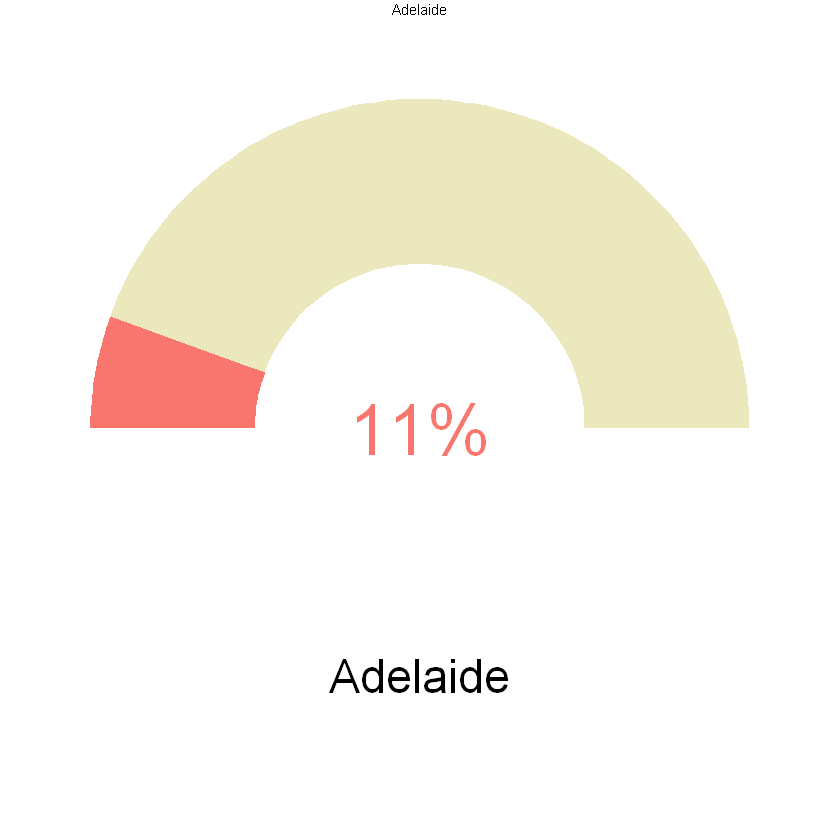

In [752]:
hotness(inp_df)

In [730]:
dec <- 0.15

In [734]:
sprintf("%s %%", (percentage * 100))

[1] "15 %"

In [706]:
inp_df <- avg_wise[avg_wise$Circuit == 'Adelaide', ]

In [743]:
inp_df

Circuit,Total,Count,Average,Min,Max,percentage
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Adelaide,2082,11,189.27,104,302,0.11


In [715]:
total_overlaps_df %>% head(5)

,Circuit,Links,Overlaps,Year,Country
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Adelaide,/en/1985/australie,302,1985,Australia
2,Adelaide,/en/1989/australie,219,1989,Australia
3,Adelaide,/en/1993/australie,119,1993,Australia
4,Adelaide,/en/1991/australie,104,1991,Australia
5,Adelaide,/en/1995/australie,159,1995,Australia


In [714]:
avg_wise %>% head(4)

Circuit,Total,Count,Average,Min,Max
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Adelaide,2082,11,189.27,104,302
Aida,423,2,211.50,159,264
Ain-Diab,166,1,166.00,166,166
Aintree,917,5,183.40,111,285


In [719]:
total_overlaps_df$Overlaps[total_overlaps_df$Circuit == 'Adelaide' & total_overlaps_df$Year == 1985]

[1] 302

In [673]:
number <- round(inp_df$Average / inp_df$Total, 3)

In [742]:
inp_df <- inp_df %>% mutate(percentage = 0.11)

In [674]:
number

[1] 0.091

In [700]:
avg_wise <- total_overlaps_df %>% select(Circuit, Overlaps, Year, Country)

In [701]:
avg_wise <- avg_wise %>% group_by(Circuit) %>% dplyr::summarise(Total = sum(Overlaps), Count = length(Circuit), Average = round(Total/Count, 2), Min = min(Overlaps), Max = max(Overlaps))

In [724]:
avg_wise <- circuits_df %>% merge(avg_wise, by.x = "Circuit", by.y = "Circuit") %>% select(-Races)

In [824]:
avg_wise

Circuit,Country,Total,Count,Average,Min,Max
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Adelaide,Australia,2082,11,189.27,104,302
Aida,Japan,423,2,211.50,159,264
Ain-Diab,Morocco,166,1,166.00,166,166
Aintree,United Kingdom,917,5,183.40,111,285
Anderstorp,Sweden,969,6,161.50,92,242
Austin,USA,1854,10,185.40,117,275
Avus,Germany,161,1,161.00,161,161
Bakou,Azerbaijan,270,1,270.00,270,270
Barcelone,Spain,6658,33,201.76,83,380


In [825]:
write_csv(df, 'final_circuit_wise_overlap.csv')

In [468]:
final_df <- cbind(newColName = rownames(overlaps_circuit_df), overlaps_circuit_df)

In [473]:
write_csv(final_df, 'final_df.csv')

In [474]:
finalist_df <- read_csv('final_df.csv')

Rows: 2021 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): newColName, Circuit
dbl (1): Overlaps

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [482]:
finalist_df <- finalist_df[!is.na(finalist_df$Circuit), ]

In [484]:
write_csv(finalist_df, 'finalist_df.csv')

In [648]:
total_overlaps_df

Circuit,Links,Overlaps,Year,Country
<chr>,<chr>,<dbl>,<dbl>,<chr>
Adelaide,/en/1985/australie,302,1985,Australia
Adelaide,/en/1989/australie,219,1989,Australia
Adelaide,/en/1993/australie,119,1993,Australia
Adelaide,/en/1991/australie,104,1991,Australia
Adelaide,/en/1995/australie,159,1995,Australia
Adelaide,/en/1988/australie,174,1988,Australia
Adelaide,/en/1986/australie,237,1986,Australia
Adelaide,/en/1990/australie,150,1990,Australia
Adelaide,/en/1994/australie,227,1994,Australia


In [489]:
finalist_df %>% group_by(Circuit) %>% dplyr::summarise(Total = sum(Overlaps), Races = length(newColName))

Circuit,Total,Races
<chr>,<dbl>,<int>
Adelaide,2082,11
Aida,423,2
Ain-Diab,166,1
Aintree,917,5
Anderstorp,969,6
Austin,1854,10
Avus,161,1
Bakou,270,1
Barcelone,6658,33


In [433]:
na_values_ov <- read_csv("./overlaps_circuits.csv")

Rows: 1016 Columns: 2
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): Circuit
dbl (1): ov_list

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [441]:
without_na <- na_values_ov[!is.na(na_values_ov$ov_list), ]

In [454]:
circuit_wise <- without_na %>% group_by(Circuit) %>% dplyr::summarise(Total = sum(ov_list))

In [457]:
circuit_wise <- merge(x = circuits_df, circuit_wise, by = 'Circuit')

In [460]:
circuit_wise <- circuit_wise %>% mutate(Average = Total/Nb)

In [463]:
(189 / 189.2727) * 100

[1] 99.85592

In [485]:
circuits_df

Circuit,Nb
<chr>,<int>
Adelaide,11
Aida,2
Ain-Diab,1
Aintree,5
Anderstorp,6
Austin,10
Avus,1
Bakou,7
Barcelone,33


In [641]:
circuit_wise <- circuit_wise %>% merge(circuits_df, by.x = "Circuit", by.y = "Circuit") %>% select(-Races)

In [642]:
write_csv(circuit_wise, "final_circuit_wise_overlaps.csv")

In [328]:
track <- sprintf('https://www.statsf1.com/en/circuit-%s.aspx', 'Adelaide')
session <- bow(track)
cpage <- scrape(session, query=list(t="semi-soft", per_page=100))

In [329]:
cpage

{html_document}
<html id="ctl00_html" lang="en">
[1] <head>\n<!-- Google Analytics --><!-- Global site tag (gtag.js) - Google  ...
[2] <body>\r\n  <form name="aspnetForm" method="post" action="/en/circuit-Ade ...

In [353]:
circuit_races <- cpage %>% html_nodes('.circuittable') %>% html_table(header = TRUE)

In [352]:
cir <- cpage %>% html_nodes('.circuittable') %>% html_nodes('td') %>% html_attr('sorttable_customkey')
cir <- cir[!is.na(cir)][2]
cir

[1] "australia"

In [365]:
circuit_links <- cpage %>% html_nodes(sprintf('td[sorttable_customkey="%s"]', cir)) %>% html_nodes('a') %>% html_attr('href')

In [377]:
bind_rows(circuit_races)

New names:
* `Time` -> `Time...6`
* `Time` -> `Time...8`
* `Time` -> `Time...10`


Date,Grand Prix,L,km,Pole position,Time...6,Win,Time...8,Fastest lap,Time...10
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3 november 1985,Australia,3.778,309.796 km,SENNA Ayrton,1'19''843,ROSBERG Keke,2h 00m 40.473s,ROSBERG Keke,1'23''758
26 october 1986,Australia,3.779,309.878 km,MANSELL Nigel,1'18''403,PROST Alain,1h 54m 20.388s,PIQUET Nelson,1'20''787
15 november 1987,Australia,3.779,309.878 km,BERGER Gerhard,1'17''267,BERGER Gerhard,1h 52m 56.144s,BERGER Gerhard,1'20''416
13 november 1988,Australia,3.780,309.960 km,SENNA Ayrton,1'17''748,PROST Alain,1h 53m 14.676s,PROST Alain,1'21''216
5 november 1989,Australia,3.780,264.600 km,SENNA Ayrton,1'16''665,BOUTSEN Thierry,2h 00m 17.421s,NAKAJIMA Satoru,1'38''480
4 november 1990,Australia,3.780,306.180 km,SENNA Ayrton,1'15''671,PIQUET Nelson,1h 49m 44.570s,MANSELL Nigel,1'18''203
3 november 1991,Australia,3.780,52.920 km,SENNA Ayrton,1'14''041,SENNA Ayrton,0h 24m 34.899s,BERGER Gerhard,1'41''141
8 november 1992,Australia,3.780,306.180 km,MANSELL Nigel,1'13''732,BERGER Gerhard,1h 46m 54.786s,SCHUMACHER Michael,1'16''078
7 november 1993,Australia,3.780,298.620 km,SENNA Ayrton,1'13''371,SENNA Ayrton,1h 43m 27.476s,HILL Damon,1'15''381


In [ ]:
link <- https://www.statsf1.com/en/1985/australie/tour-par-tour.aspx
link <- https://www.statsf1.com/en/1985/australie/tour-par-tour.aspx

In [372]:
circuit_links <- sub(x = circuit_links, pattern = "\\.aspx$", replacement = '')

In [378]:
ov_list <- sapply(X = circuit_links, FUN = total_overlaps)

In [381]:
circs <- data.frame(ov_list)

In [384]:
circs <- circs %>% mutate('Circuit' = 'Adelaide')

In [364]:
circuit_links[1]

"/en/1985/australie.aspx"

In [368]:
for (link in circuit_links){
    link <- replace(x = link, '.aspx', '')
    print(link)
}

                                              .aspx 
"/en/1985/australie.aspx"                        "" 
                                              .aspx 
"/en/1986/australie.aspx"                        "" 
                                              .aspx 
"/en/1987/australie.aspx"                        "" 
                                              .aspx 
"/en/1988/australie.aspx"                        "" 
                                              .aspx 
"/en/1989/australie.aspx"                        "" 
                                              .aspx 
"/en/1990/australie.aspx"                        "" 
                                              .aspx 
"/en/1991/australie.aspx"                        "" 
                                              .aspx 
"/en/1992/australie.aspx"                        "" 
                                              .aspx 
"/en/1993/australie.aspx"                        "" 
                                              

In [359]:
circuit_links[1]

[1] "/en/1985/australie.aspx"

In [345]:
circuit_races <- cbind(circuit_races, circuit_links)

In [346]:
circuit_races

circuit_races                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 [1,] 3 november 1985   , 26 october 1986   , 15 november 1987  , 13 november 1988  , 5 november 1989   , 4 november 1990   , 3 november 1991   , 8 november 1992   , 7 november 1993   , 13 november 1994  , 12 november 1995  ,                   , Australia         , Australia         , Australia         , Australia         , Australia         , Australia         , Australia         , Australia         , Australia         , Australia         , Australia         ,                   , 3.778             , 3.779             , 3.779             , 3.78              , 3.78              , 3.78              , 3.78              , 3.78              , 3.78              , 3.78              , 3.78              , NA                , 309.796 km        , 309.878 km        , 309.878 km        , 309.960 km        , 264.600 km        , 306.180 km        , 52.920 km         , 306.180 km        , 298.620 km        , 306.180 km        , 306.180 km        ,                   , SENNA Ayrton      , MANSELL Nigel     , BERGER Gerhard    , SENNA Ayrton      , SENNA Ayrton      , SENNA Ayrton      , SENNA Ayrton      , MANSELL Nigel     , SENNA Ayrton      , MANSELL Nigel     , HILL Damon        ,                   , 1'19''843         , 1'18''403         , 1'17''267         , 1'17''748         , 1'16''665         , 1'15''671         , 1'14''041         , 1'13''732         , 1'13''371         , 1'16''179         , 1'15''505         ,                   , ROSBERG Keke      , PROST Alain       , BERGER Gerhard    , PROST Alain       , BOUTSEN Thierry   , PIQUET Nelson     , SENNA Ayrton      , BERGER Gerhard 

In [143]:
merge_df <- function(list_of_df) {
  for (i in 1:length(list_of_df)) {
    rows <- nrow(list_of_df[[i]])
    list_of_df[[i]] <- list_of_df[[i]][1:(rows - 1), ]
  }
  return(bind_rows(list_of_df))
  # Return the modified list of data frames
}

In [13]:
df <- merge_df(circuit_races)

New names:
* `Time` -> `Time...6`
* `Time` -> `Time...8`
* `Time` -> `Time...10`
New names:
* `Time` -> `Time...6`
* `Time` -> `Time...8`
* `Time` -> `Time...10`
New names:
* `Time` -> `Time...6`
* `Time` -> `Time...8`
* `Time` -> `Time...10`
New names:
* `Time` -> `Time...6`
* `Time` -> `Time...8`
* `Time` -> `Time...10`
New names:
* `Time` -> `Time...6`
* `Time` -> `Time...8`
* `Time` -> `Time...10`
New names:
* `Time` -> `Time...6`
* `Time` -> `Time...8`
* `Time` -> `Time...10`
New names:
* `Time` -> `Time...6`
* `Time` -> `Time...8`
* `Time` -> `Time...10`
New names:
* `Time` -> `Time...6`
* `Time` -> `Time...8`
* `Time` -> `Time...10`
New names:
* `Time` -> `Time...6`
* `Time` -> `Time...8`
* `Time` -> `Time...10`


In [14]:
df

Date,Grand Prix,L,km,Pole position,Time...6,Win,Time...8,Fastest lap,Time...10
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
21 may 1950,Monaco,3.180,318.000 km,FANGIO Juan Manuel,1'50''200,FANGIO Juan Manuel,3h 13m 18.700s,FANGIO Juan Manuel,1'51''000
22 may 1955,Monaco,3.145,314.500 km,FANGIO Juan Manuel,1'41''100,TRINTIGNANT Maurice,2h 58m 09.700s,FANGIO Juan Manuel,1'42''400
13 may 1956,Monaco,3.145,314.500 km,FANGIO Juan Manuel,1'44''000,MOSS Stirling,3h 00m 32.900s,FANGIO Juan Manuel,1'44''400
19 may 1957,Monaco,3.145,330.225 km,FANGIO Juan Manuel,1'42''700,FANGIO Juan Manuel,3h 10m 12.800s,FANGIO Juan Manuel,1'45''600
18 may 1958,Monaco,3.145,314.500 km,BROOKS Tony,1'39''800,TRINTIGNANT Maurice,2h 52m 27.900s,HAWTHORN Mike,1'40''600
10 may 1959,Monaco,3.145,314.500 km,MOSS Stirling,1'39''600,BRABHAM Jack,2h 55m 51.300s,BRABHAM Jack,1'40''400
29 may 1960,Monaco,3.145,314.500 km,MOSS Stirling,1'36''300,MOSS Stirling,2h 53m 45.500s,McLAREN Bruce,1'36''200
14 may 1961,Monaco,3.145,314.500 km,MOSS Stirling,1'39''100,MOSS Stirling,2h 45m 50.100s,MOSS StirlingGINTHER Richie,1'36''300
3 june 1962,Monaco,3.145,314.500 km,CLARK Jim,1'35''400,McLAREN Bruce,2h 46m 29.700s,CLARK Jim,1'35''500


In [22]:
library(lubridate)

In [26]:
df$Date <- year(dmy(df$Date))

In [27]:
df

Date,Grand Prix,L,km,Pole position,Time...6,Win,Time...8,Fastest lap,Time...10
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1950,Monaco,3.180,318.000 km,FANGIO Juan Manuel,1'50''200,FANGIO Juan Manuel,3h 13m 18.700s,FANGIO Juan Manuel,1'51''000
1955,Monaco,3.145,314.500 km,FANGIO Juan Manuel,1'41''100,TRINTIGNANT Maurice,2h 58m 09.700s,FANGIO Juan Manuel,1'42''400
1956,Monaco,3.145,314.500 km,FANGIO Juan Manuel,1'44''000,MOSS Stirling,3h 00m 32.900s,FANGIO Juan Manuel,1'44''400
1957,Monaco,3.145,330.225 km,FANGIO Juan Manuel,1'42''700,FANGIO Juan Manuel,3h 10m 12.800s,FANGIO Juan Manuel,1'45''600
1958,Monaco,3.145,314.500 km,BROOKS Tony,1'39''800,TRINTIGNANT Maurice,2h 52m 27.900s,HAWTHORN Mike,1'40''600
1959,Monaco,3.145,314.500 km,MOSS Stirling,1'39''600,BRABHAM Jack,2h 55m 51.300s,BRABHAM Jack,1'40''400
1960,Monaco,3.145,314.500 km,MOSS Stirling,1'36''300,MOSS Stirling,2h 53m 45.500s,McLAREN Bruce,1'36''200
1961,Monaco,3.145,314.500 km,MOSS Stirling,1'39''100,MOSS Stirling,2h 45m 50.100s,MOSS StirlingGINTHER Richie,1'36''300
1962,Monaco,3.145,314.500 km,CLARK Jim,1'35''400,McLAREN Bruce,2h 46m 29.700s,CLARK Jim,1'35''500


In [108]:
final_df <- data.frame()

In [109]:
# Assuming you already have a data frame 'final_df' and a list 'test'
final_df <- rbind(final_df, data.frame(Circuit = 
                                       'Monaco', Years = toString(test)))

In [110]:
final_df

Circuit,Years
<chr>,<chr>
Monaco,"1950, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023"


In [194]:
year <- unlist(strsplit(final_df$Years, ','))

In [136]:
year <- unlist(year)

In [195]:
year[2]

[1] " 1955"

In [196]:
year

[1] "1950"  " 1955" " 1956" " 1957" " 1958" " 1959" " 1960" " 1961" " 1962"
[10] " 1963" " 1964" " 1965" " 1966" " 1967" " 1968" " 1969" " 1970" " 1971"
[19] " 1972" " 1973" " 1974" " 1975" " 1976" " 1977" " 1978" " 1979" " 1980"
[28] " 1981" " 1982" " 1983" " 1984" " 1985" " 1986" " 1987" " 1988" " 1989"
[37] " 1990" " 1991" " 1992" " 1993" " 1994" " 1995" " 1996" " 1997" " 1998"
[46] " 1999" " 2000" " 2001" " 2002" " 2003" " 2004" " 2005" " 2006" " 2007"
[55] " 2008" " 2009" " 2010" " 2011" " 2012" " 2013" " 2014" " 2015" " 2016"
[64] " 2017" " 2018" " 2019" " 2021" " 2022" " 2023"

In [52]:
test <- df$Date

In [82]:
test

[1] 1950 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
[16] 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
[31] 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
[46] 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
[61] 2014 2015 2016 2017 2018 2019 2021 2022 2023

In [56]:
final_df

ERROR: Error in rbind(deparse.level, ...): invalid list argument: all variables should have the same length


In [55]:
final_df

<0 x 0 matrix>

In [167]:
list_of_dfs <- function(circuit){
    track <- sprintf('https://www.statsf1.com/en/circuit-%s.aspx', tolower(circuit))
    print(circuit)
    session <- bow(track)
    page <- scrape(session, query=list(t="semi-soft", per_page=100))
    circuit_races <- page %>% html_nodes('.circuittable') %>% html_table(header = TRUE)
    return(circuit_races)
}

In [168]:
safe_lists <- possibly(.f = list_of_dfs, otherwise = NA)

In [190]:
merge_df <- function(circuit){
    suppressMessages({
    track <- sprintf('https://www.statsf1.com/en/circuit-%s.aspx', tolower(circuit))
    print(circuit)
    session <- bow(track)
    page <- scrape(session, query=list(t="semi-soft", per_page=100))
    circuit_races <- page %>% html_nodes('.circuittable') %>% html_table(header = TRUE)
    final_df <- data.frame()
    for (i in 1:length(circuit_races)) {
        rows <- nrow(circuit_races[[i]])
        circuit_races[[i]] <- circuit_races[[i]][1:(rows - 1), ]
        }
        circuit_races <- bind_rows(circuit_races)
        circuit_races$Date <- year(dmy(circuit_races$Date))
        final_df <- data.frame()
        years <- circuit_races$Date
        final_df <- rbind(final_df, data.frame(Circuit = circuit, Years = toString(years)))
    return(final_df)
        })
}

In [191]:
safer_merge <- possibly(.f = merge_df, otherwise = NULL)

In [169]:
pre <- map(circuits_df$Circuit, safer_merge)

[1] "Adelaide"
[1] "Aida"
[1] "Ain-Diab"
[1] "Aintree"
[1] "Anderstorp"
[1] "Austin"
[1] "Avus"
[1] "Bakou"
[1] "Barcelone"
[1] "Brands-Hatch"
[1] "Bremgarten"
[1] "Buenos-Aires"
[1] "Caesars-Palace"
[1] "Clermont-Ferrand"
[1] "Dallas"
[1] "Detroit"
[1] "Dijon-Prenois"
[1] "Djeddah"
[1] "Donington"
[1] "East-London"
[1] "Estoril"
[1] "Fuji"
[1] "Hockenheim"
[1] "Hungaroring"
[1] "Imola"
[1] "Indianapolis"
[1] "Interlagos"
[1] "Istanbul"
[1] "Jacarepagua"
[1] "Jarama"
[1] "Jerez-de-la-Frontera"
[1] "Kuala-Lumpur"
[1] "Kyalami"
[1] "Las-Vegas"
[1] "Le-Castellet"
[1] "Le-Mans"
[1] "Long-Beach"
[1] "Losail"
[1] "Magny-Cours"
[1] "Melbourne"
[1] "Mexico-City"
[1] "Miami"
[1] "Monaco"
[1] "Monsanto"
[1] "Mont-Tremblant"
[1] "Montjuic-Park"
[1] "Montreal"
[1] "Monza"
[1] "Mosport-Park"
[1] "Mugello"
[1] "New-Delhi"
[1] "Nivelles"
[1] "Nurburgring"
[1] "Osterreichring"
[1] "Pedralbes"
[1] "Pescara"
[1] "Phoenix"
[1] "Portimao"
[1] "Porto"
[1] "Reims"
[1] "Riverside"
[1] "Rouen-les-Essarts"
[1]

In [175]:
pre %>% class()

[1] "list"

In [ ]:
merge_df <- function(circuit){
    list_of_df <- safe_lists(circuit)
    final_df <- data.frame()
    for (i in 1:length(list_of_df)) {
        rows <- nrow(list_of_df[[i]])
        list_of_df[[i]] <- list_of_df[[i]][1:(rows - 1), ]
        }
    circuit_races <- bind_rows(list_of_df)
    circuit_races$Date <- year(dmy(circuit_races$Date))
    final_df <- data.frame()
    years <- circuit_races$Date
    final_df <- rbind(final_df, data.frame(Circuit = circuit, Years = toString(years)))
    return(final_df)
}

In [180]:
all_circuits <- bind_rows(pre[!is.na(pre)])

In [197]:
all_circuits <- merge(circuits_df, all_circuits, by = 'Circuit')

In [570]:
all_circuits

Circuit,Nb,Years
<chr>,<int>,<chr>
Adelaide,11,"1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995"
Aida,2,"1994, 1995"
Ain-Diab,1,1958
Aintree,5,"1955, 1957, 1959, 1961, 1962"
Anderstorp,6,"1973, 1978, 1974, 1975, 1976, 1977"
Austin,10,"2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022"
Avus,1,1959
Bakou,7,"2016, 2017, 2018, 2019, 2021, 2022, 2023"
Barcelone,33,"1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023"


In [229]:
#define function to catch integer(0)
integer0_test <- function(data) {
 
  if(identical(data, integer(0))) {
    return(0)
  }

  else {
    return(data)
  }

}

In [375]:
total_overlaps <- function(link){
    suppressMessages({
    url <- sprintf('https://www.statsf1.com%s/tour-par-tour.aspx', link)
    url <- bow(url)
    page <- scrape(url, query=list(t="semi-soft", per_page=100))

    scores_df_header <- page %>% html_node('.datatable') %>% html_table(header = FALSE)
    scores_df <- page %>% html_node('.datatable') %>% html_table(header = FALSE)
    names <- page %>% html_node('.datatable') %>% html_nodes('a') %>% html_text()
    names <- names[-1]

    namespos <- as.character(as.vector(scores_df[1, ]))
    namespos <- namespos[-1]

    titles <- page %>% html_node('.datatable') %>% html_nodes('a') %>% html_attr('title')
    titles <- titles[-1]
    titles <- c("Laps", titles)
    
    laps <- (scores_df_header %>% nrow()) - 1
        
    names(scores_df_header) <- titles

    for (i in 2:length(titles)){
        scores_df_header[[i]] <- mapvalues(scores_df_header[[i]], from = namespos, to = names)
    }

    scores_df_header <- scores_df_header[-1]
    
    overlap <- 0
    df <- data.frame()
    for (name in names){
        for (i in 1:laps){
            a <- which(scores_df_header[i, ] == name) - which(scores_df_header[i+1, ] == name)
            a <- integer0_test(a)
            if (a > 0){
                overlap <- overlap + a
            }
        }
        df <- rbind(df, c(name, overlap))
        overlap <- 0
        a <- 0
    }
    names(df) <- c('Driver', 'Overlaps')
    df[[1]] <- mapvalues(df[[1]], from=names, to=titles[-1])
    total <- sum(as.integer(df$Overlaps))
    return(total)
        })
    }

In [291]:
df

Circuits,Links
<chr>,<chr>
Britain,/en/1950/grande-bretagne
Monaco,/en/1950/monaco
Indianapolis,/en/1950/indianapolis
Switzerland,/en/1950/suisse
Belgium,/en/1950/belgique
France,/en/1950/france
Italy,/en/1950/italie


In [233]:
test <- total_overlaps(df, 'Britain')

In [239]:
test

Driver,Overlaps
<chr>,<chr>
G.FARINA,3
L.FAGIOLI,4
J.FANGIO,4
R.PARNELL,3
P.BIRA,0
Y.GIRAUD-CABANTOUS,4
E.MARTIN,1
E.de GRAFFENRIED,3
L.ROSIER,4


In [238]:
sum(as.integer(test$Overlaps))

[1] 97

In [ ]:
overlap_per_circuit <- function(link){
    url <- 
}

In [313]:
race_circuits <- function(year){
    session <- bow(sprintf("https://www.statsf1.com/en/%d.aspx", year), force = TRUE)
    result <- scrape(session, query=list(t="semi-soft", per_page=100))
    circuits <- result %>% html_nodes('.pays') %>% html_text2()
    links <- result %>% html_nodes('.gp') %>% html_node('.flag') %>% html_node('a') %>% html_attr('href')
    circuits <- gsub("\\d+\\. ", "", circuits)
    links <- gsub("\\.aspx$", "", links)
    circuits <- gsub("\r| ", "", circuits)
    final <- data.frame(Circuits = circuits, Links = links)
    s <- sapply(X = final$Links, FUN = total_overlaps)
    return(s)
}

In [314]:
df <- race_circuits(1985)

In [ ]:
df

In [257]:
total_overlaps('/en/1950/indianapolis')

ERROR: [1m[33mError[39m in `scores_df_header[[i]]`:[22m
[33m![39m Can't extract columns past the end.
[1m[22m[36mi[39m Location 2 doesn't exist.
[36mi[39m There are only 0 columns.


In [ ]:
race_circuits <- function(year){
  session <- bow(sprintf("https://www.statsf1.com/en/%d.aspx", year), force = TRUE)
  result <- scrape(session, query=list(t="semi-soft", per_page=100)
  circuits <- result %>% html_nodes('.pays') %>% html_text2()
  links <- result %>% html_nodes('.gp') %>% html_node('.flag') %>% html_node('a') %>% html_attr('href')
  circuits <- gsub("\\d+\\. ", "", circuits)
  links <- gsub("\\.aspx$", "", links)
  circuits <- gsub("\r| ", "", circuits)
  final <- data.frame(Circuits = circuits, Links = links)
  
  return(final)
}

In [260]:
year <- 2022

In [261]:
session <- bow(sprintf("https://www.statsf1.com/en/%d.aspx", year), force = TRUE)
result <- scrape(session, query=list(t="semi-soft", per_page=100))

In [270]:
driver_links <- result %>% html_nodes('.libelle') %>% html_node('a') %>% html_attr('href')

In [271]:
driver_links

[1] "/en/max-verstappen.aspx"   "/en/charles-leclerc.aspx" 
 [3] "/en/sergio-perez.aspx"     "/en/george-russell.aspx"  
 [5] "/en/carlos-sainz.aspx"     "/en/lewis-hamilton.aspx"  
 [7] "/en/lando-norris.aspx"     "/en/esteban-ocon.aspx"    
 [9] "/en/fernando-alonso.aspx"  "/en/valtteri-bottas.aspx" 
[11] "/en/daniel-ricciardo.aspx" "/en/sebastian-vettel.aspx"
[13] "/en/kevin-magnussen.aspx"  "/en/pierre-gasly.aspx"    
[15] "/en/lance-stroll.aspx"     "/en/mick-schumacher.aspx" 
[17] "/en/yuki-tsunoda.aspx"     "/en/guanyu-zhou.aspx"     
[19] "/en/alexander-albon.aspx"  "/en/nicholas-latifi.aspx" 
[21] "/en/nyck-de-vries.aspx"    "/en/nico-hulkenberg.aspx" 
[23] "/en/red-bull.aspx"         "/en/ferrari.aspx"         
[25] "/en/mercedes.aspx"         "/en/alpine.aspx"          
[27] "/en/mclaren.aspx"          "/en/alfa-romeo.aspx"      
[29] "/en/aston-martin.aspx"     "/en/haas.aspx"            
[31] "/en/alphatauri.aspx"       "/en/williams.aspx"

In [272]:
drivernames <- result %>% html_nodes('.libelle') %>% html_node('a') %>% html_text2()

In [275]:
drivers_df <- data.frame(Driver = drivernames, Profile = driver_links)

In [278]:
dlink <- sprintf('https://www.statsf1.com%s', '/en/max-verstappen.aspx')
url <- bow(dlink)
page <- scrape(url, query=list(t="semi-soft", per_page=100))

In [280]:
page %>% html_node('#ctl00_CPH_Main_IMG_Photo') %>% html_attr('src')

[1] "/pilotes/photos/verstapm.png"

In [281]:
y <- 'https://www.statsf1.com/pilotes/photos/verstapm.png'

In [282]:
download.file(y,'y.jpg', mode = 'wb')

In [285]:
library(magick)

Linking to ImageMagick 6.9.12.3
Enabled features: cairo, freetype, fftw, ghostscript, heic, lcms, pango, raw, rsvg, webp
Disabled features: fontconfig, x11



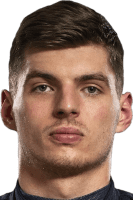

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      133    200 sRGB       TRUE     13798 72x72  

In [296]:
image_read('https://www.statsf1.com/pilotes/photos/verstapm.png')

In [276]:
drivers_df

Driver,Profile
<chr>,<chr>
M. VERSTAPPEN,/en/max-verstappen.aspx
C. LECLERC,/en/charles-leclerc.aspx
S. PEREZ,/en/sergio-perez.aspx
G. RUSSELL,/en/george-russell.aspx
C. SAINZ,/en/carlos-sainz.aspx
L. HAMILTON,/en/lewis-hamilton.aspx
L. NORRIS,/en/lando-norris.aspx
E. OCON,/en/esteban-ocon.aspx
F. ALONSO,/en/fernando-alonso.aspx


In [290]:
gfx_race_circuits <- function(year){
  session <- bow(sprintf("https://www.statsf1.com/en/%d.aspx", year), force = TRUE)
  result <- scrape(session, query=list(t="semi-soft", per_page=100))
  driver_links <- result %>% html_nodes('.libelle') %>% html_node('a') %>% html_attr('href')
  driver_names <- result %>% html_nodes('.libelle') %>% html_node('a') %>% html_text2()
  driver_info <- data.frame(Driver = driver_names, Profile = driver_links)

  return(driver_info)
}

In [292]:
info <- gfx_race_circuits(1950)

In [294]:
info

Driver,Profile
<chr>,<chr>
G. FARINA,/en/giuseppe-farina.aspx
J. FANGIO,/en/juan-manuel-fangio.aspx
L. FAGIOLI,/en/luigi-fagioli.aspx
L. ROSIER,/en/louis-rosier.aspx
A. ASCARI,/en/alberto-ascari.aspx
J. PARSONS,/en/johnnie-parsons.aspx
B. HOLLAND,/en/bill-holland.aspx
P. BIRA,/en/prince-bira.aspx
P. WHITEHEAD,/en/peter-whitehead.aspx


In [295]:
test

Driver,Overlaps
<chr>,<chr>
G.FARINA,3
L.FAGIOLI,4
J.FANGIO,4
R.PARNELL,3
P.BIRA,0
Y.GIRAUD-CABANTOUS,4
E.MARTIN,1
E.de GRAFFENRIED,3
L.ROSIER,4


In [306]:
get_images <- function(link){
    url <- sprintf('https://www.statsf1.com/en%s', link)
    req <- bow(url)
    page <- scrape(req, query=list(t="semi-soft", per_page=100))
    p1 <- page %>% html_node('#ctl00_CPH_Main_IMG_Photo') %>% html_attr('src')
    return (sprintf('https://www.statsf1.com%s', p1))
}

In [307]:
get_images('/charles-leclerc.aspx')

[1] "https://www.statsf1.com/pilotes/photos/leclerc.png"